In [1]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pro = ts.pro_api()


In [3]:
# SMA
# The strategy implemented used the crossing of the SMA-30 and SMA 100.
# SMA-30 is the Short Moving Average of 30 days and SMA-100 is Short Moving Average of 100 days.
# So, the next thing to do is to find out what the 30 and 100 day averages are.
def chart(df):
    # moving average with a 30 days window
    SMA_30 = pd.DataFrame()
    SMA_30['close'] = df['close'].rolling(window=30).mean()
    SMA_30

    # 100 days
    SMA_100 = pd.DataFrame()
    SMA_100['close'] = df['close'].rolling(window=100).mean()
    SMA_100

    data = pd.DataFrame()
    data['date'] = df['trade_date']
    data['close'] = df['close']
    data['SMA_30'] = SMA_30['close']
    data['SMA_100'] = SMA_100['close']

    return data


In [4]:
# indicators to buy and sell.
def buy_sell(data):
    sig_price_buy = []
    sig_price_sell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA_30'][i] > data['SMA_100'][i]:
            if flag != 1:
                sig_price_buy.append(data['close'][i])
                sig_price_sell.append(np.nan)
                flag = 1
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        elif data['SMA_30'][i] < data['SMA_100'][i]:
            if flag != 0:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(data['close'][i])
                flag = 0
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        else:
            sig_price_buy.append(np.nan)
            sig_price_sell.append(np.nan)
    return (sig_price_buy, sig_price_sell)


In [5]:
# date and buy_sell
def dates(data):
    buy_dates = data.loc[data['buy_signal_price'] > 0]
    sell_dates = data.loc[data['sell_signal_price'] > 0]
    buy_dates.drop(columns=['sell_signal_price',
                                        'SMA_30', 'SMA_100'], inplace=True)
    sell_dates.drop(columns=['buy_signal_price',
                                          'SMA_30', 'SMA_100'], inplace=True)

    dates = pd.concat([buy_dates, sell_dates], sort=True)
    dates.sort_values(by='date', inplace=True)
    dates.drop(
        columns=['close'], inplace=True)
    dates.set_index('date', inplace=True)

    print(dates)


In [6]:
# drawing
def graph(data, code):
    ab = plt.figure(figsize=[20, 12])
    # data.date = pd.to_datetime(data.date).dt.strftime('%b %d %Y')

    plt.plot(data['close'], label='PMAC', alpha=0.35)
    plt.plot(data['SMA_30'], label='SMA30', alpha=0.7)
    plt.plot(data['SMA_100'], label='SMA100', alpha=0.7)
    plt.scatter(data.index, data['buy_signal_price'],
                label='Buy', marker='^', color='green')
    plt.scatter(data.index, data['sell_signal_price'],
                label='Sell', marker='v', color='red')

    plt.title('{} close price hsitory buy and cell signals'.format(code))
    plt.xlabel('{} - {}'.format(data['date'].iloc[-1],  data['date'].iloc[0]))
    plt.ylabel('Close price RMB')
    plt.legend()
    plt.show()


In [7]:
def graphChart(stock_data, code):
    data = chart(stock_data)
    buy_sell_data = buy_sell(data)
    data['buy_signal_price'] = buy_sell_data[0]
    data['sell_signal_price'] = buy_sell_data[1]

    graph(data, code)
    dates(data)


1浦发银行600000.SH


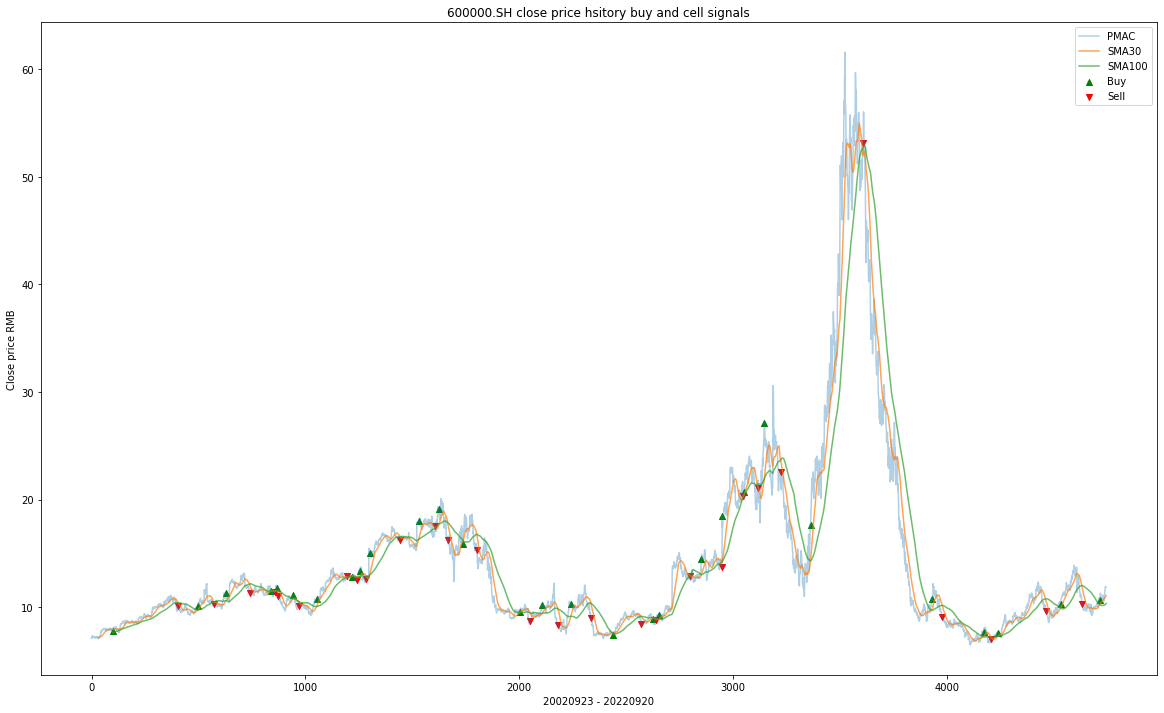

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20021111             10.72                NaN
20030325               NaN              10.33
20030825             10.33                NaN
20031208               NaN               9.64
20041116              7.64                NaN
20041227               NaN               7.03
20050228              7.74                NaN
20051213               NaN               9.11
20060317             10.77                NaN
20070910               NaN              53.19
20080908             17.67                NaN
20090413               NaN              22.53
20090803             27.10                NaN
20090916               NaN              21.13
20091218             20.73                NaN
20091225               NaN              20.35
20100609             18.50                NaN
20100610               NaN              13.70
20101109             14.51                NaN
20110125               NaN        

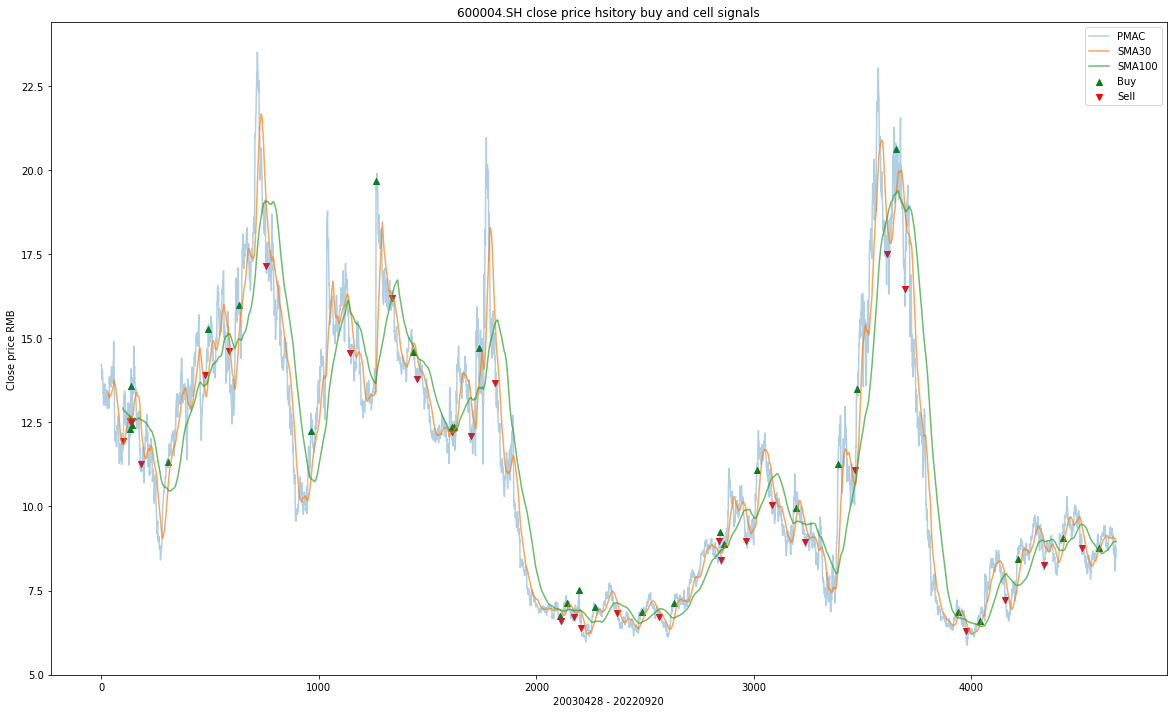

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20030826              8.77                NaN
20031219               NaN               8.76
20040511              9.05                NaN
20040908               NaN               8.27
20050316              8.43                NaN
20050614               NaN               7.23
20060123              6.60                NaN
20060510               NaN               6.29
20060630              6.87                NaN
20070706               NaN              16.45
20070903             20.62                NaN
20071108               NaN              17.51
20080604             13.49                NaN
20080616               NaN              11.09
20081015             11.25                NaN
20090525               NaN               8.95
20090729              9.95                NaN
20100106               NaN              10.04
20100422             11.09                NaN
20100708               NaN        

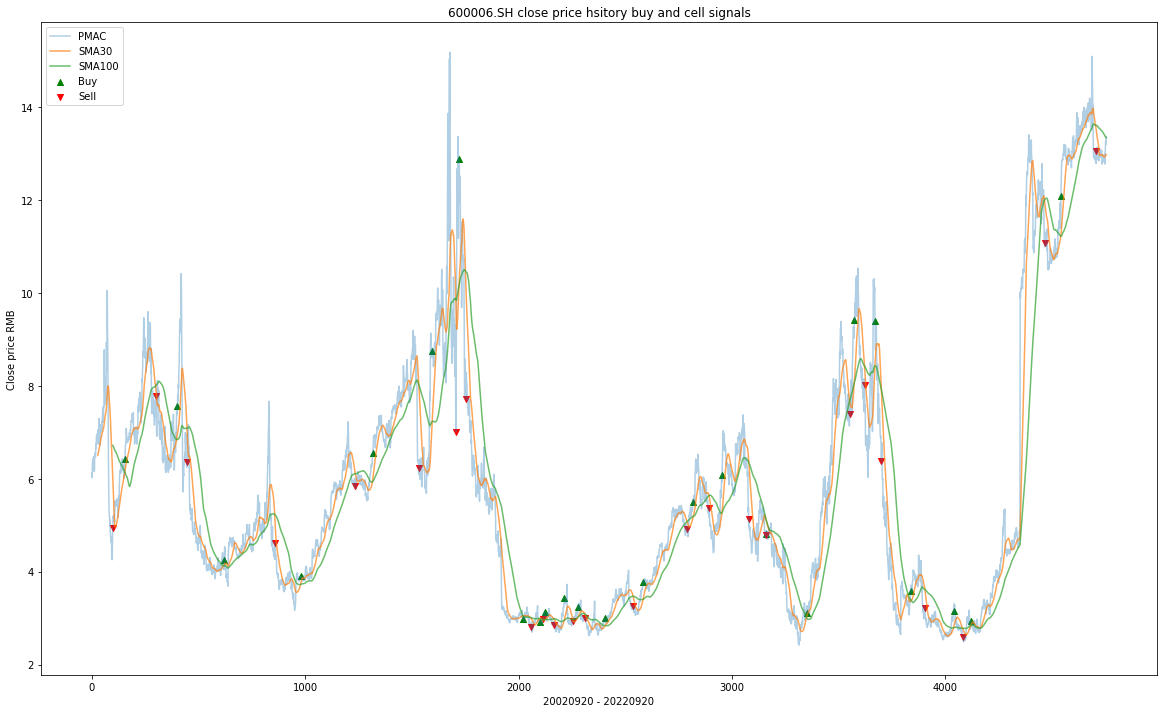

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20021206               NaN              13.06
20030818             12.10                NaN
20031212               NaN              11.08
20050531              2.94                NaN
20050722               NaN               2.60
20050921              3.15                NaN
20060417               NaN               3.21
20060724              3.59                NaN
20070329               NaN               6.38
20070517              9.39                NaN
20070726               NaN               8.02
20071010              9.43                NaN
20071109               NaN               7.40
20080905              3.11                NaN
20090623               NaN               4.80
20090625              4.82                NaN
20091026               NaN               5.14
20100430              6.08                NaN
20100802               NaN               5.37
20101124              5.51        

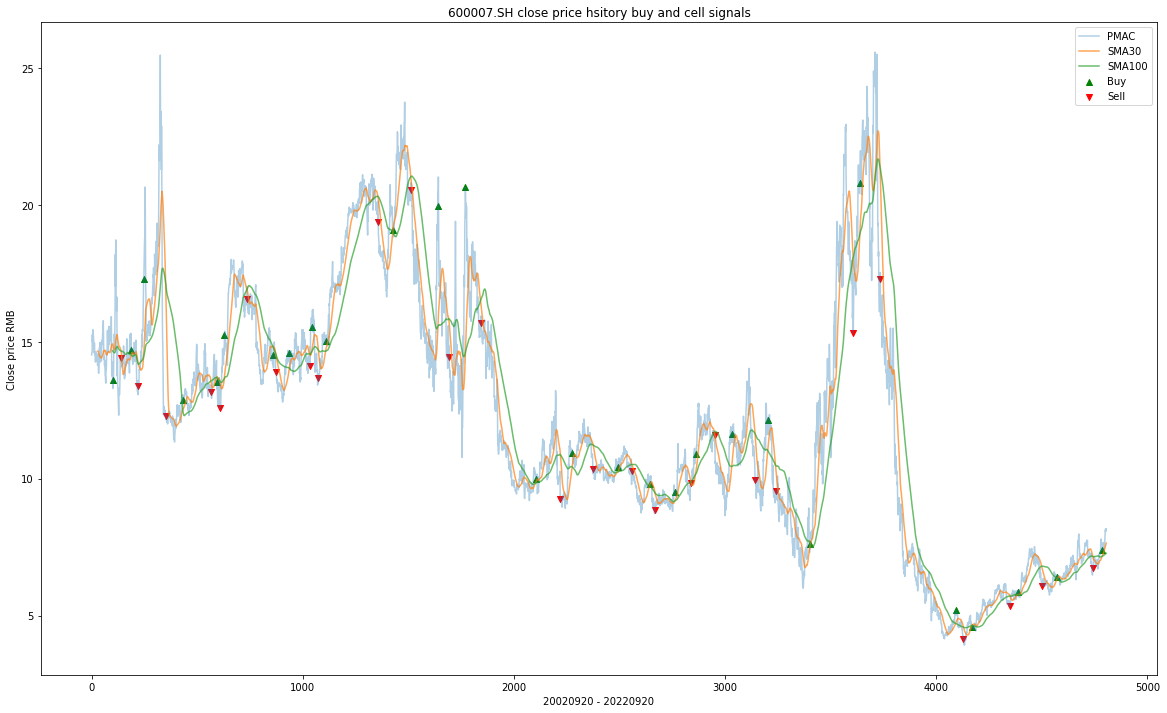

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20021029              7.41                NaN
20021230               NaN               6.72
20030915              6.41                NaN
20040106               NaN               6.09
20040702              5.86                NaN
20040820               NaN               5.34
20050530              4.57                NaN
20050725               NaN               4.16
20050914              5.19                NaN
20070509               NaN              17.29
20070921             20.79                NaN
20071112               NaN              15.33
20080909              7.62                NaN
20090521               NaN               9.56
20090715             12.14                NaN
20091014               NaN               9.97
20100329             11.62                NaN
20100728               NaN              11.59
20101214             10.91                NaN
20110113               NaN        

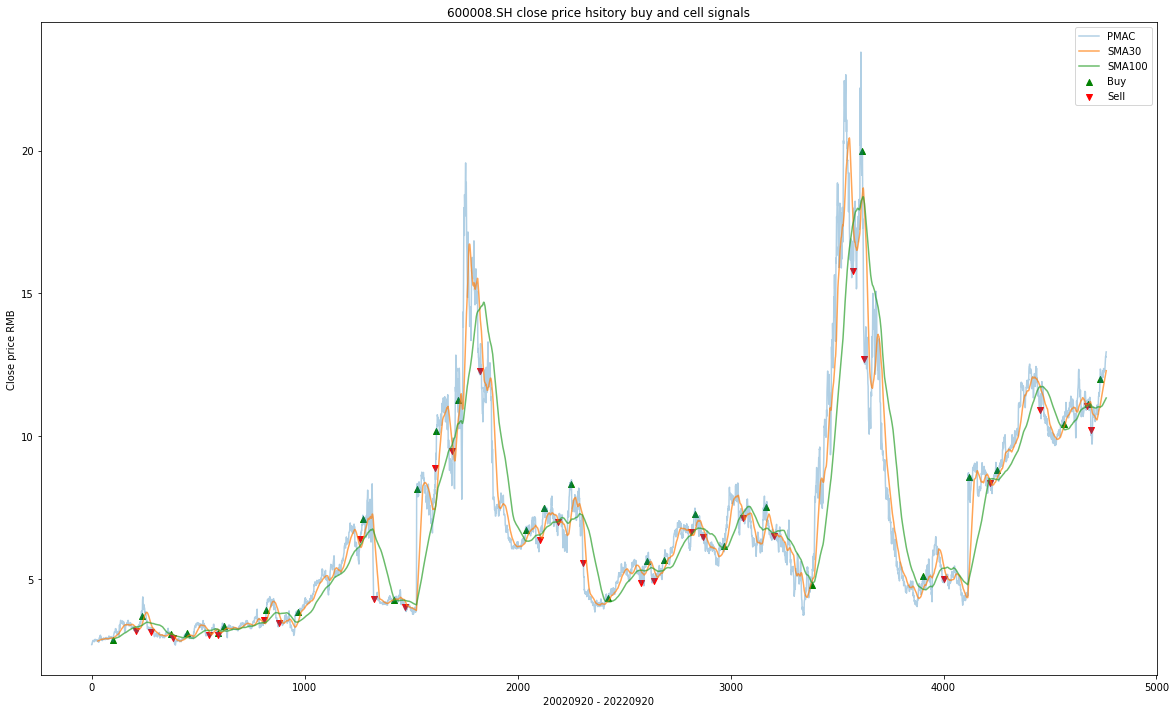

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20021108             12.00                NaN
20030109               NaN              10.21
20030212             11.13                NaN
20030218               NaN              11.05
20030801             10.44                NaN
20040109               NaN              10.93
20041119              8.82                NaN
20050106               NaN               8.36
20050610              8.57                NaN
20051128               NaN               5.01
20060627              5.09                NaN
20070816               NaN              12.69
20070830             19.99                NaN
20071113               NaN              15.78
20080828              4.80                NaN
20090601               NaN               6.51
20090727              7.53                NaN
20100104               NaN               7.15
20100519              6.14                NaN
20101020               NaN        

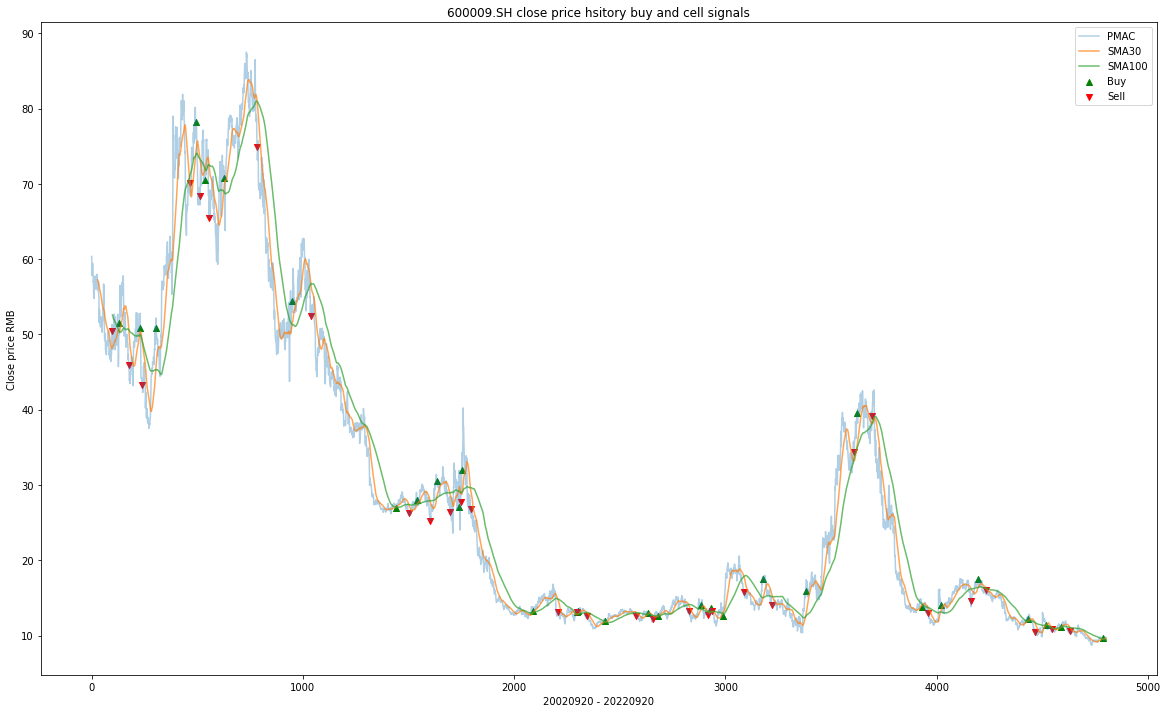

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20021021              9.61                NaN
20030617               NaN              10.55
20030814             11.08                NaN
20031022               NaN              10.87
20031201             11.40                NaN
...                    ...                ...
20210923               NaN              43.27
20211018             50.90                NaN
20211227               NaN              45.99
20220310             51.46                NaN
20220427               NaN              50.41

[62 rows x 2 columns]
7包钢股份600010.SH


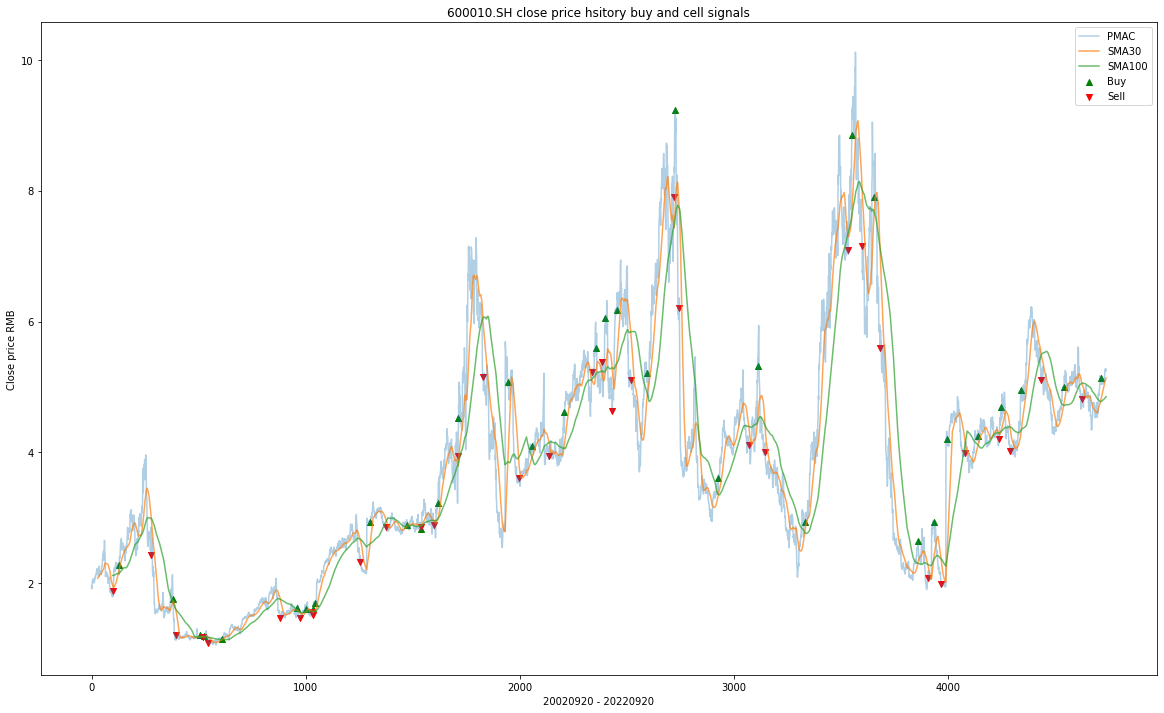

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20021105              5.13                NaN
20030319               NaN               4.81
20030729              5.00                NaN
20031231               NaN               5.10
20040601              4.96                NaN
...                    ...                ...
20210203               NaN               1.20
20210302              1.76                NaN
20210728               NaN               2.43
20220317              2.27                NaN
20220427               NaN               1.88

[70 rows x 2 columns]
8华能国际600011.SH


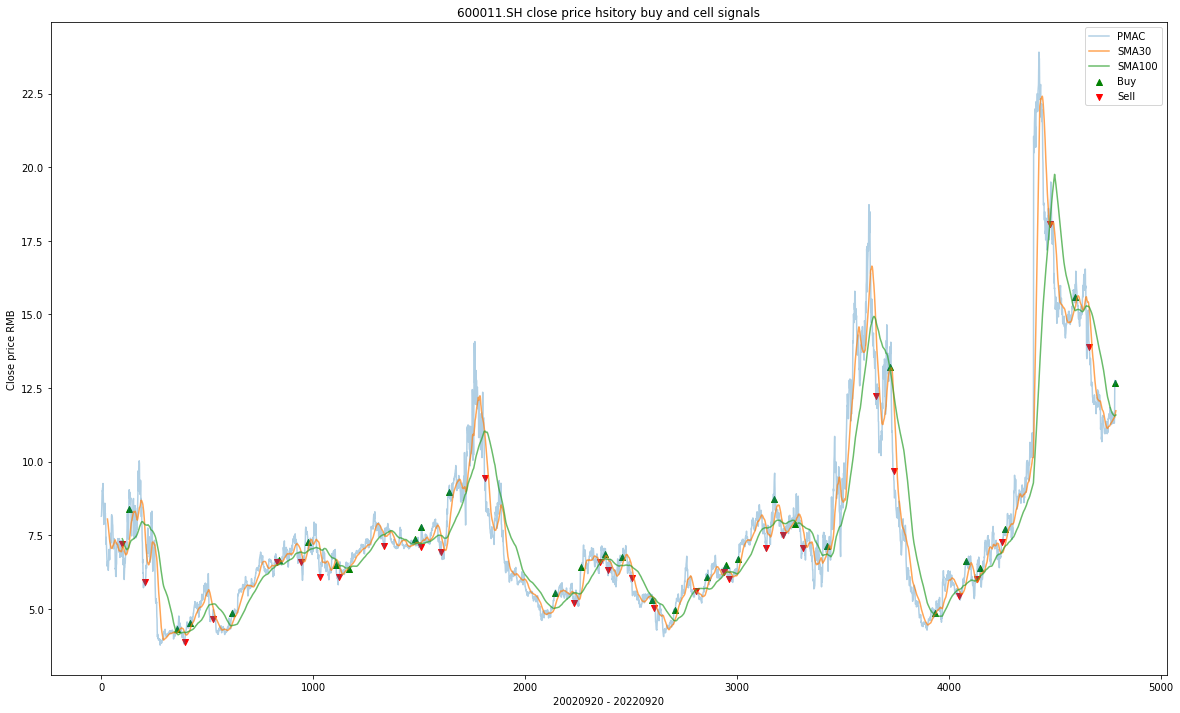

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20020926             12.69                NaN
20030409               NaN              13.89
20030728             15.58                NaN
20040115               NaN              18.08
20041209              7.73                NaN
20041230               NaN               7.26
20050609              6.40                NaN
20050704               NaN               6.03
20050914              6.63                NaN
20051107               NaN               5.45
20060616              4.86                NaN
20070405               NaN               9.68
20070427             13.22                NaN
20070809               NaN              12.24
20080725              7.14                NaN
20090115               NaN               7.07
20090313              7.89                NaN
20090609               NaN               7.52
20090810              8.75                NaN
20090928               NaN        

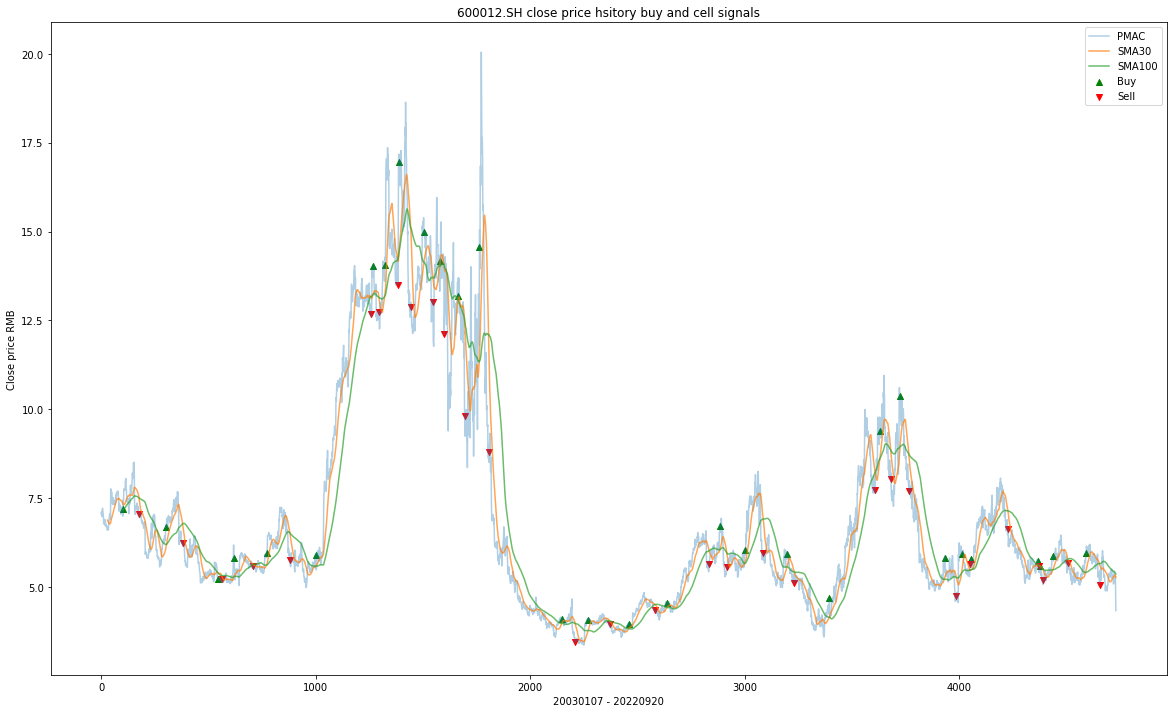

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20030513               NaN               5.06
20030812              5.94                NaN
20031215               NaN               5.67
20040402              5.86                NaN
20040617               NaN               5.18
20040702              5.59                NaN
20040713               NaN               5.59
20040715              5.72                NaN
20050216               NaN               6.64
20051101              5.79                NaN
20051108               NaN               5.65
20060104              5.92                NaN
20060414               NaN               4.75
20060710              5.81                NaN
20070319               NaN               7.71
20070523             10.38                NaN
20070724               NaN               8.05
20071009              9.38                NaN
20071108               NaN               7.74
20080922              4.68        

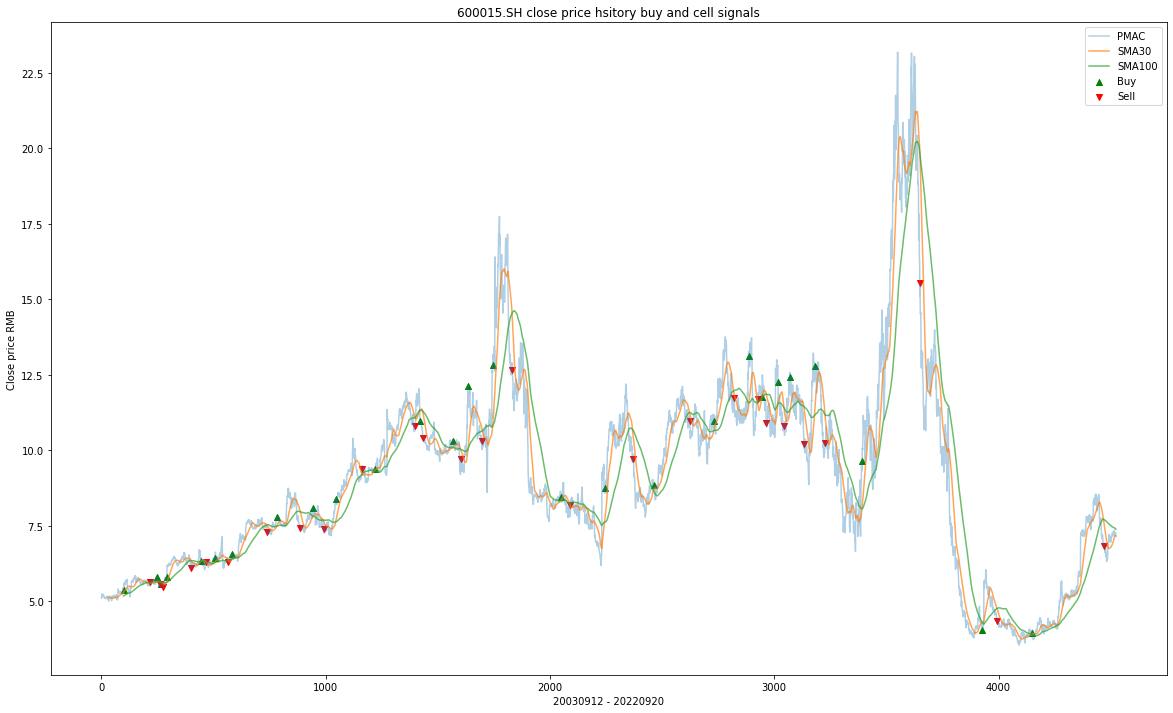

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20031208               NaN               6.84
20050414              3.94                NaN
20051205               NaN               4.35
20060614              4.06                NaN
20070809               NaN              15.53
20080905              9.64                NaN
20090518               NaN              10.24
20090724             12.79                NaN
20090930               NaN              10.20
20091231             12.42                NaN
20100210               NaN              10.80
20100326             12.25                NaN
20100707               NaN              10.90
20100805             11.78                NaN
20100831               NaN              11.70
20101104             13.14                NaN
20110217               NaN              11.75
20110628             10.97                NaN
20111205               NaN              10.98
20120806              8.86        

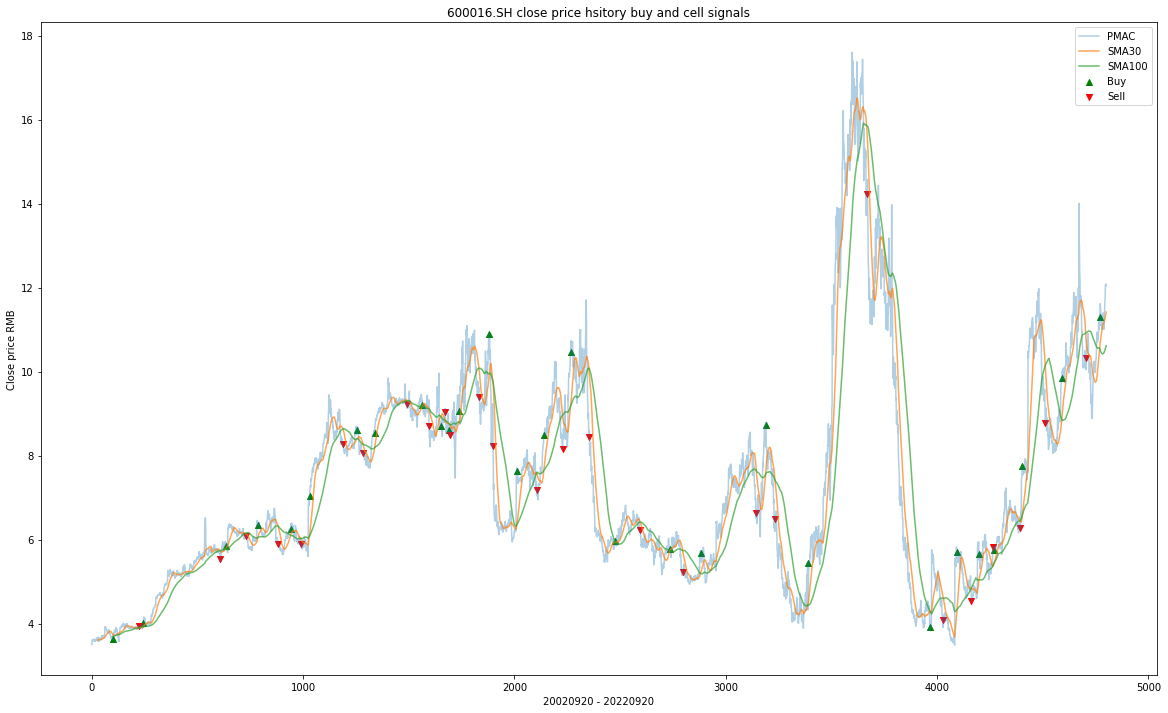

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20021112             11.30                NaN
20030225               NaN              10.32
20030814              9.84                NaN
20031209               NaN               8.78
20040601              7.76                NaN
20040617               NaN               6.28
20041215              5.75                NaN
20041222               NaN               5.83
20050406              5.66                NaN
20050602               NaN               4.53
20050905              5.71                NaN
20060113               NaN               4.08
20060424              3.93                NaN
20070730               NaN              14.24
20080922              5.45                NaN
20090520               NaN               6.49
20090724              8.72                NaN
20090925               NaN               6.64
20101105              5.68                NaN
20110316               NaN        

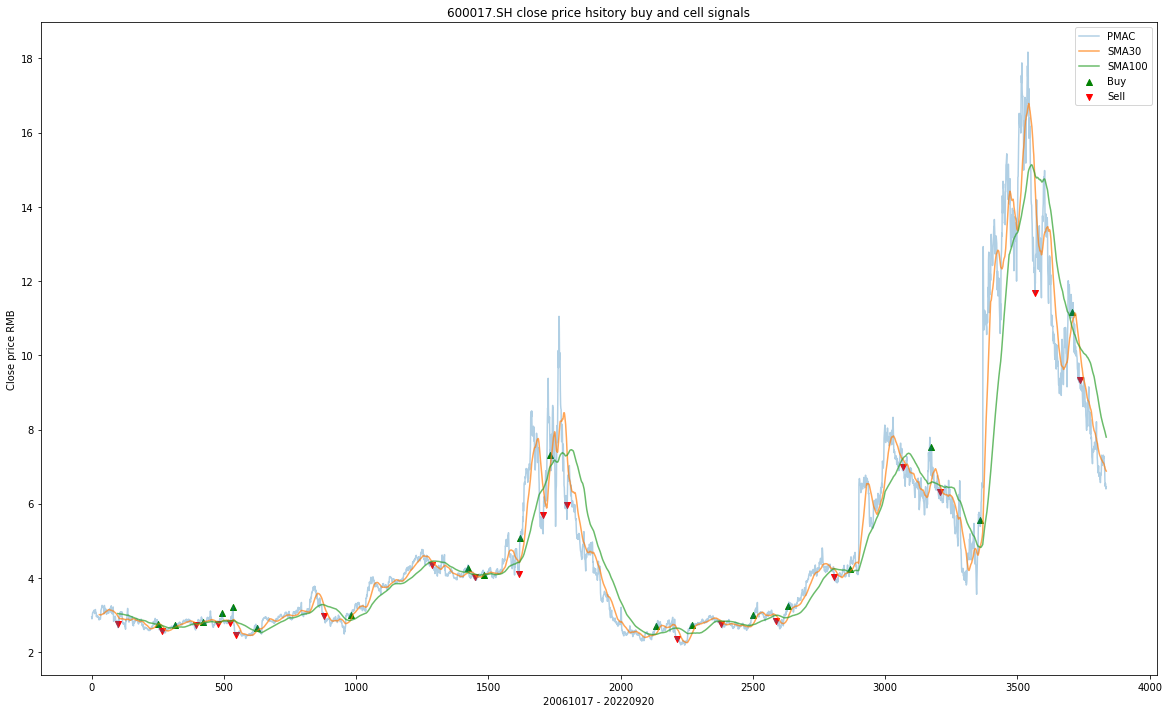

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20070321               NaN               9.34
20070510             11.17                NaN
20071130               NaN              11.69
20081015              5.56                NaN
20090611               NaN               6.32
20090727              7.52                NaN
20100106               NaN               6.98
20101115              4.24                NaN
20110211               NaN               4.02
20111117              3.25                NaN
20120202               NaN               2.85
20120613              3.00                NaN
20121205               NaN               2.77
20130524              2.74                NaN
20130820               NaN               2.36
20131218              2.70                NaN
20150506               NaN               5.97
20150805              7.32                NaN
20150914               NaN               5.70
20160125              5.09        

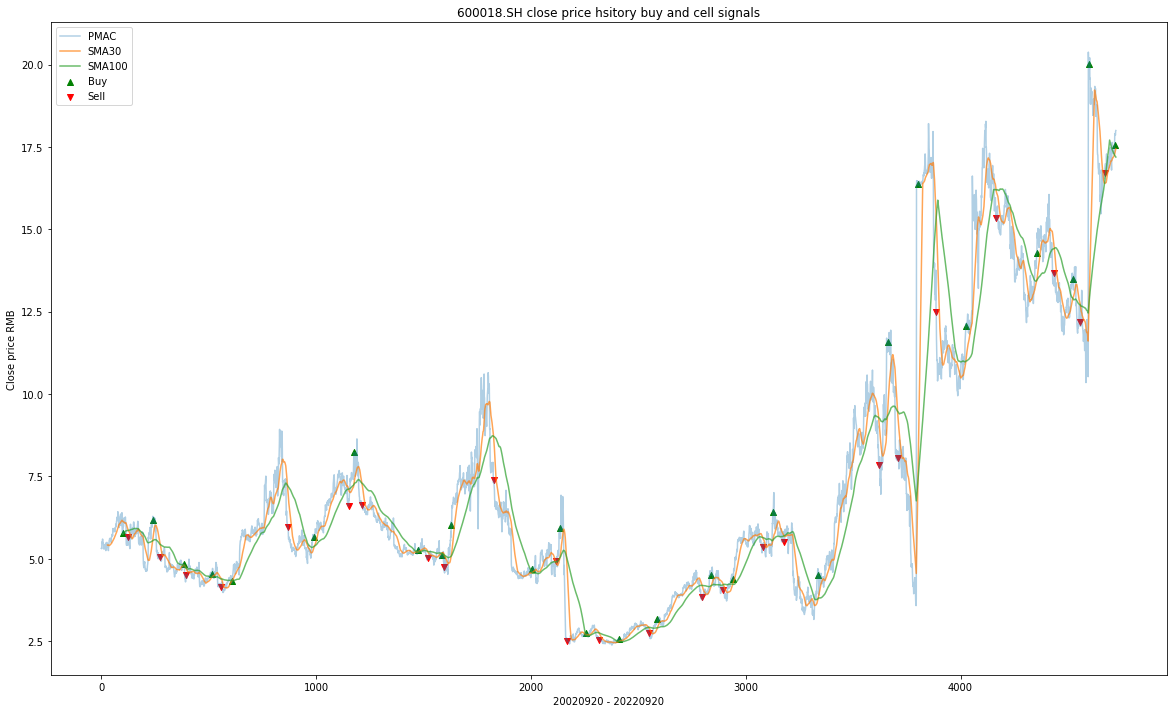

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20021008             17.57                NaN
20021211               NaN              16.70
20030403             20.03                NaN
20030610               NaN              12.20
20030730             13.48                NaN
20031205               NaN              13.69
20040412             14.29                NaN
20050119               NaN              15.36
20050930             12.07                NaN
20060510               NaN              12.49
20060914             16.38                NaN
20070309               NaN               8.06
20070523             11.58                NaN
20070719               NaN               7.86
20080924              4.52                NaN
20090526               NaN               5.51
20090810              6.43                NaN
20091026               NaN               5.37
20100520              4.39                NaN
20100726               NaN        

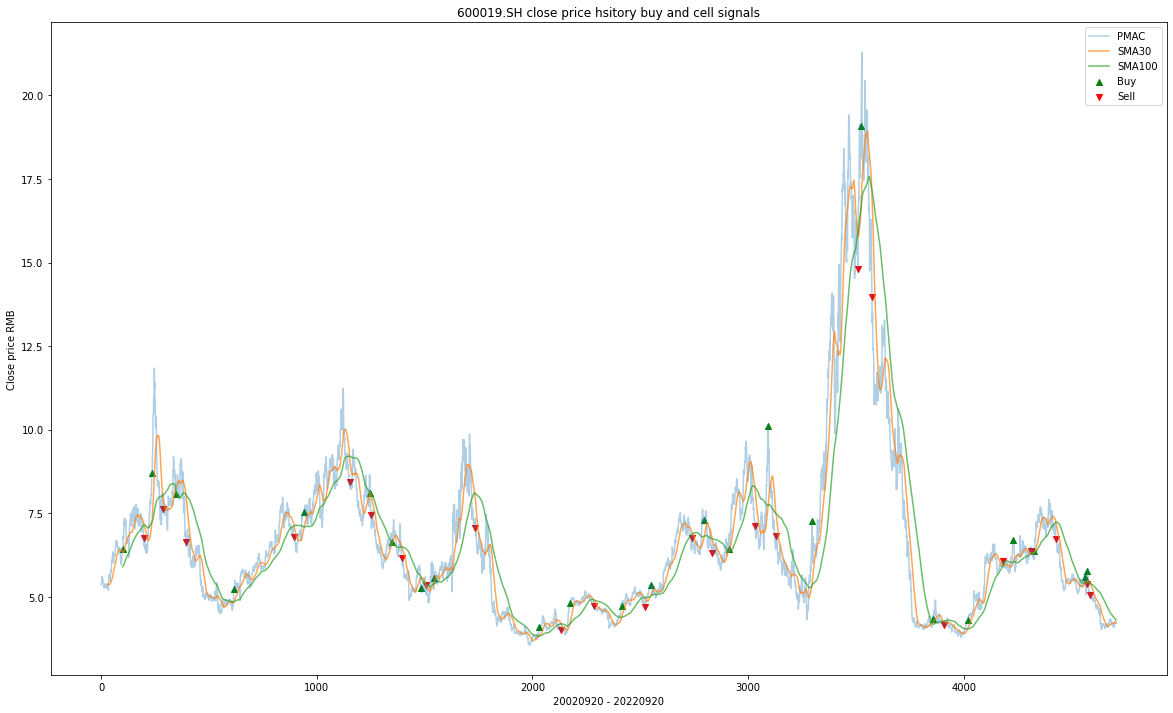

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20030328               NaN               5.06
20030417              5.77                NaN
20030422               NaN               5.40
20030514              5.59                NaN
20031127               NaN               6.73
20040430              6.38                NaN
20040526               NaN               6.37
20040924              6.69                NaN
20041213               NaN               6.07
20050923              4.31                NaN
20060317               NaN               4.16
20060608              4.35                NaN
20070803               NaN              13.97
20071019             19.08                NaN
20071109               NaN              14.81
20080926              7.27                NaN
20090611               NaN               6.82
20090803             10.10                NaN
20091104               NaN               7.11
20100506              6.44        

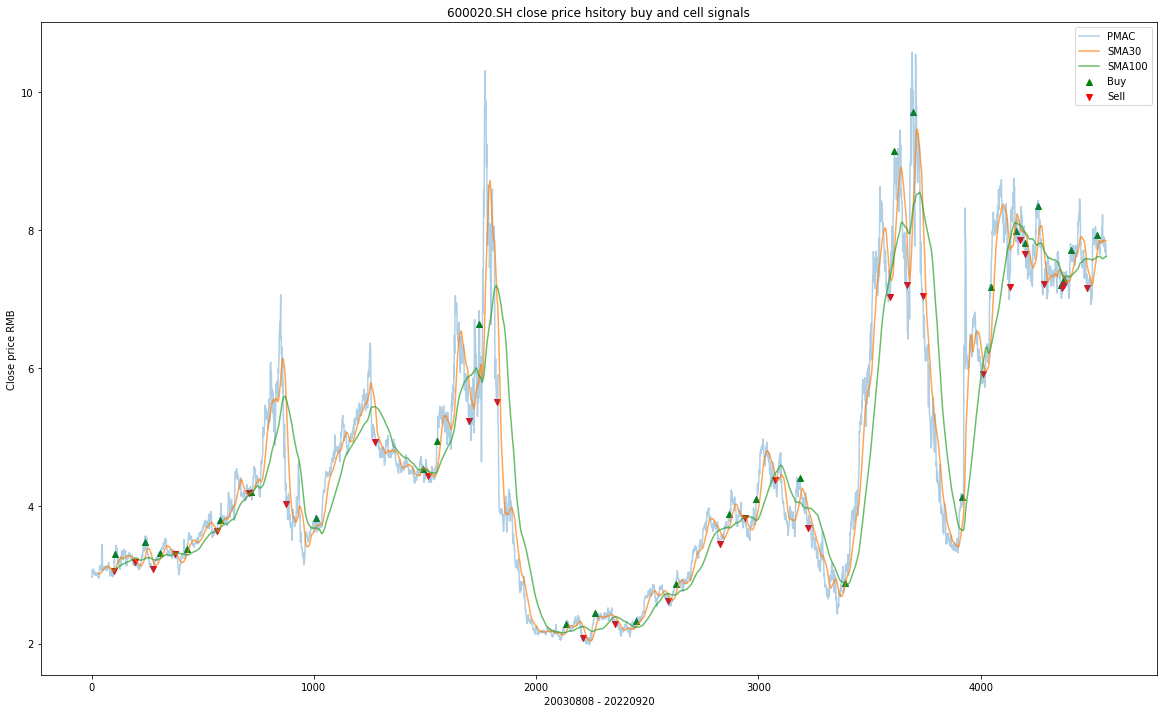

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20031014              7.93                NaN
20031217               NaN               7.16
20040402              7.71                NaN
20040525               NaN               7.20
20040531              7.29                NaN
20040608               NaN               7.16
20040616              7.20                NaN
20040929               NaN               7.22
20041116              8.35                NaN
20050203               NaN               7.65
20050216              7.81                NaN
20050318               NaN               7.86
20050415              7.98                NaN
20050601               NaN               7.17
20050930              7.17                NaN
20051124               NaN               5.91
20060712              4.13                NaN
20070403               NaN               7.04
20070612              9.71                NaN
20070723               NaN        

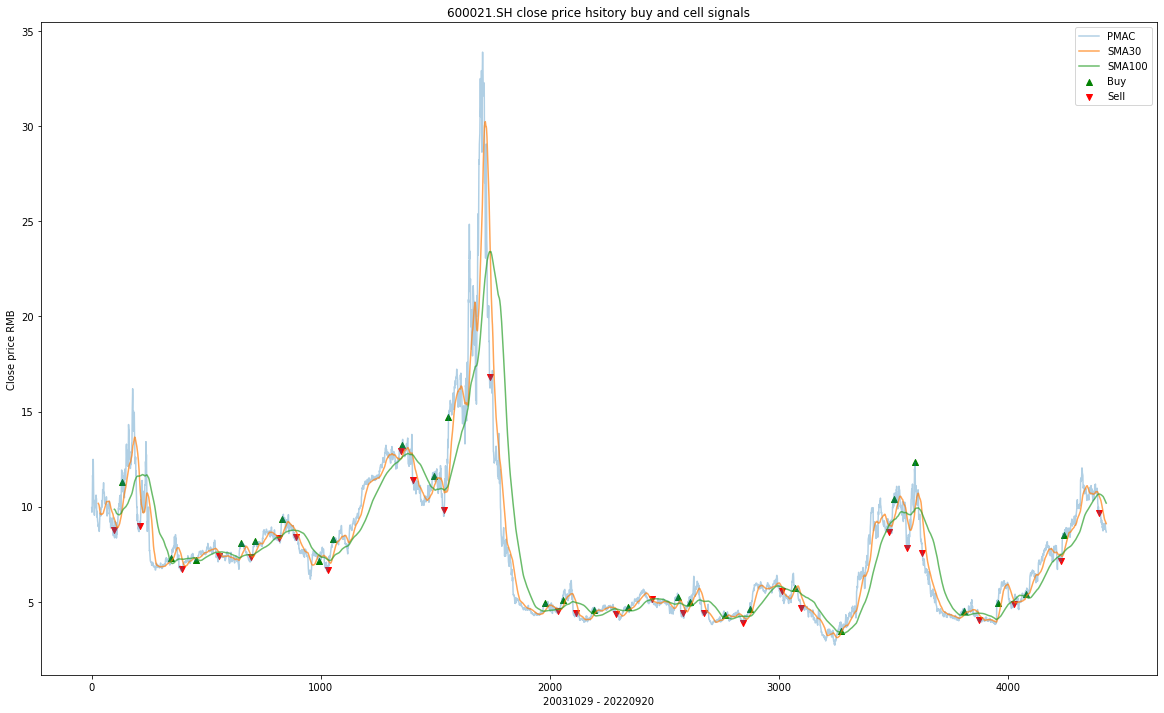

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20031215               NaN               9.67
20040802              8.53                NaN
20040823               NaN               7.14
20050412              5.41                NaN
20050704               NaN               4.87
20051028              4.93                NaN
20060329               NaN               4.05
20060707              4.54                NaN
20070405               NaN               7.54
20070529             12.34                NaN
20070719               NaN               7.82
20071011             10.39                NaN
20071112               NaN               8.67
20080918              3.45                NaN
20090618               NaN               4.69
20090723              5.70                NaN
20091020               NaN               5.57
20100517              4.60                NaN
20100705               NaN               3.89
20101101              4.28        

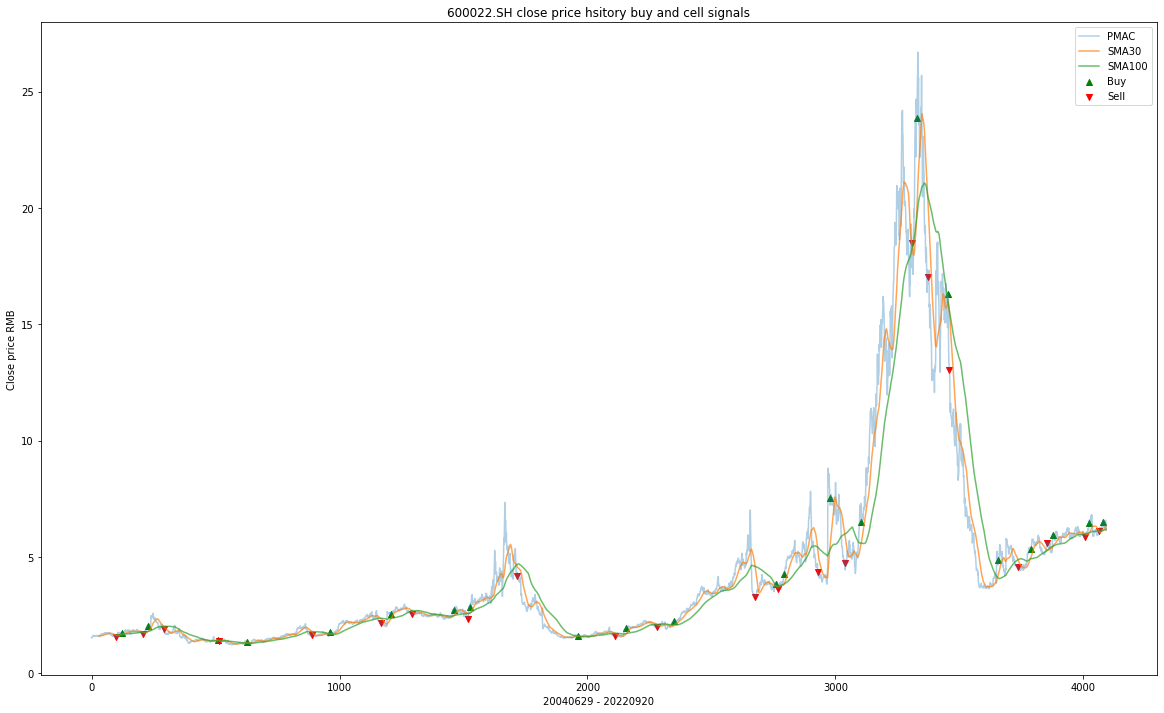

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20040719              6.51                NaN
20040809               NaN               6.13
20041012              6.45                NaN
20041104               NaN               5.85
20050523              5.96                NaN
20050627               NaN               5.61
20050927              5.34                NaN
20051214               NaN               4.57
20060616              4.86                NaN
20070404               NaN              13.05
20070411             16.29                NaN
20070813               NaN              17.04
20071022             23.89                NaN
20071114               NaN              18.49
20080918              6.50                NaN
20090105               NaN               4.72
20090410              7.53                NaN
20090623               NaN               4.35
20100428              4.28                NaN
20100607               NaN        

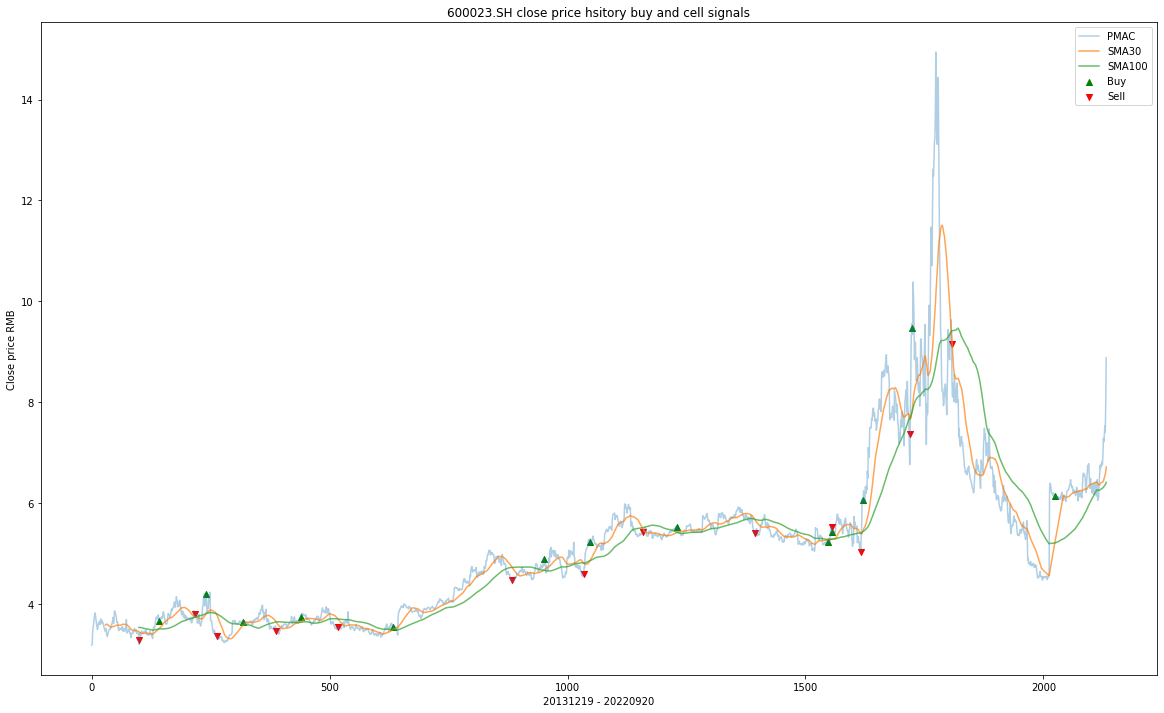

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20140603              6.13                NaN
20150422               NaN               9.16
20150819              9.47                NaN
20150825               NaN               7.37
20160122              6.06                NaN
20160128               NaN               5.03
20160429              5.42                NaN
20160503               NaN               5.53
20160513              5.22                NaN
20161228               NaN               5.40
20170829              5.52                NaN
20171214               NaN               5.43
20180531              5.22                NaN
20180621               NaN               4.60
20181025              4.89                NaN
20190129               NaN               4.48
20200214              3.53                NaN
20200804               NaN               3.54
20201201              3.74                NaN
20210218               NaN        

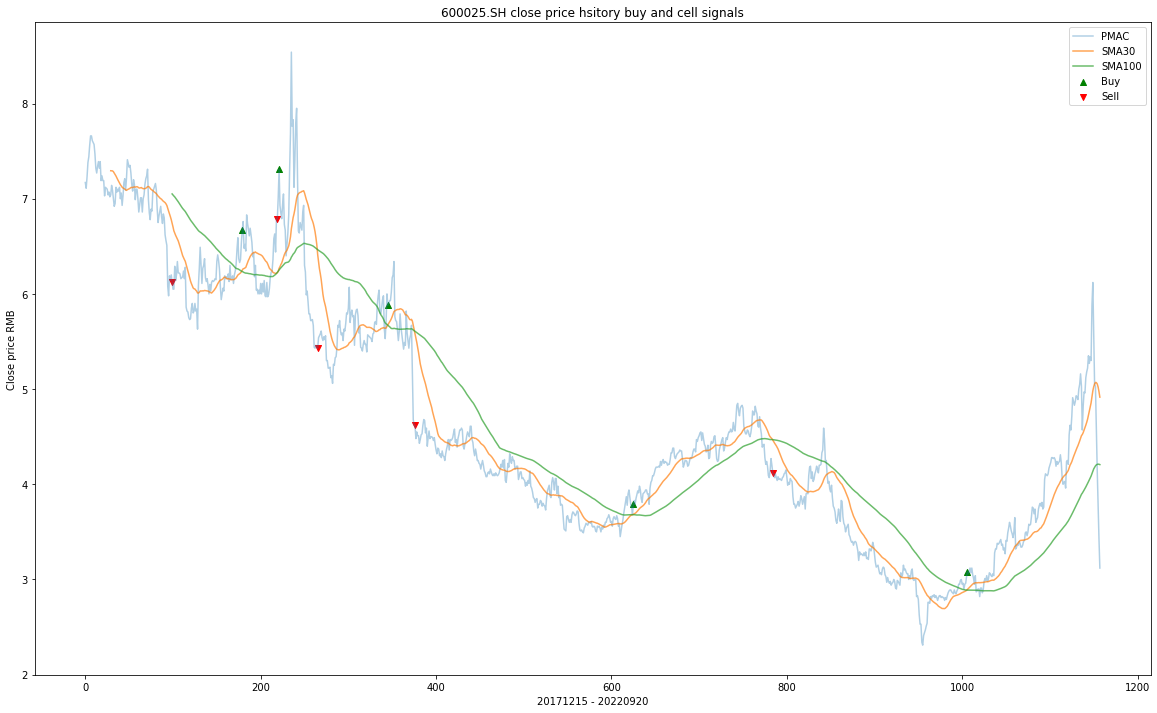

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


          buy_signal_price  sell_signal_price
date                                         
20180731              3.08                NaN
20190702               NaN               4.12
20200227              3.79                NaN
20210308               NaN               4.62
20210421              5.88                NaN
20210817               NaN               5.43
20211027              7.31                NaN
20211029               NaN               6.79
20211224              6.67                NaN
20220427               NaN               6.12
20中远海能600026.SH


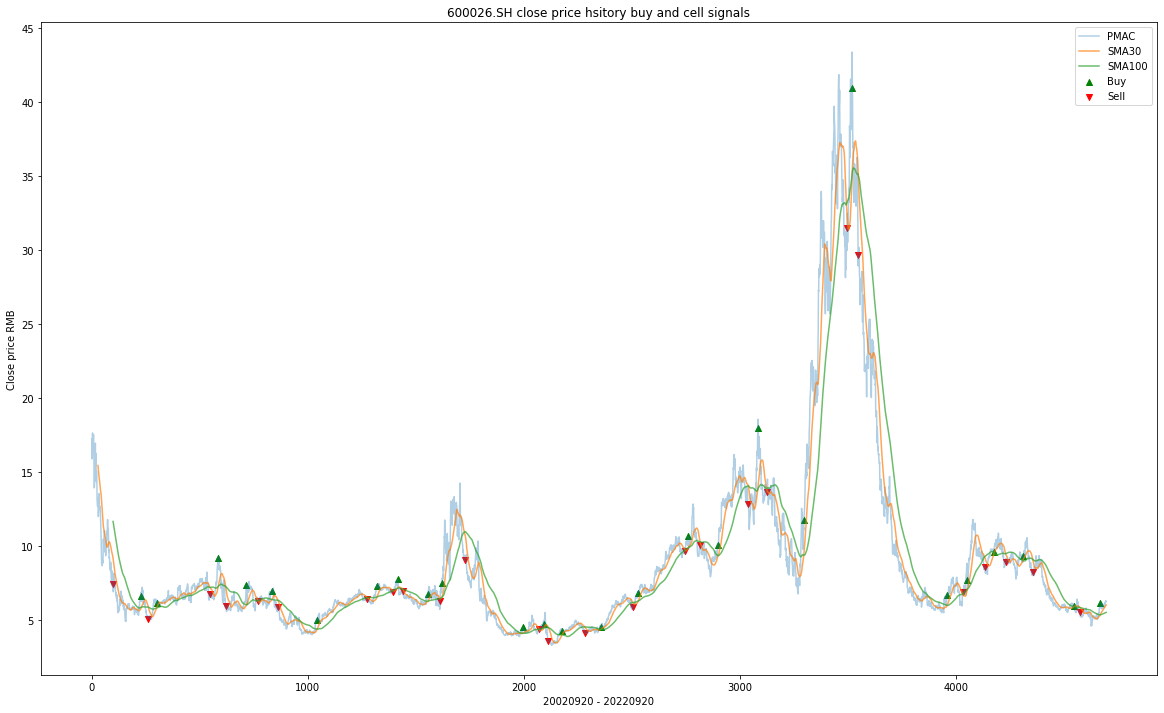

          buy_signal_price  sell_signal_price
date                                         
20021106              6.18                NaN
20030331               NaN               5.55
20030516              5.97                NaN
20040301               NaN               8.28
20040512              9.34                NaN
20040902               NaN               8.92
20041123              9.61                NaN
20050126               NaN               8.56
20050607              7.72                NaN
20050705               NaN               6.90
20051021              6.70                NaN
20070828               NaN              29.69
20071012             40.99                NaN
20071120               NaN              31.52
20080910             11.79                NaN
20090609               NaN              13.64
20090805             18.01                NaN
20091013               NaN              12.83
20100510             10.07                NaN
20100909               NaN        

/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns=['sell_signal_price',
/var/folders/yh/vylg18md66l3xcxkl97zrx400000gn/T/ipykernel_18041/1378744086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns=['buy_signal_price',


In [8]:
# https://tushare.pro/document/2?doc_id=25
# https://tushare.pro/document/2?doc_id=27

# get Constituents of SSE
data = pro.stock_basic(exchange='SSE', list_status='L',
                       fields='ts_code,symbol,name,area,industry,list_date')
# print(data.head())

start_date = '20020920'
end_date = '20220920'

for i in range(20):
    ts_code = data['ts_code'][i]
    name = data['name'][i]
    print(str(i + 1) + name + ts_code)
    
    stock_data = pro.daily(ts_code=ts_code,
                           start_date=start_date, end_date=end_date).drop(columns=[
                               'low', 'high', 'pre_close', 'ts_code', 'change', 'vol', 'pct_chg', 'amount'])
    graphChart(stock_data, ts_code)


In [9]:
# # Model: Logistic regression analysis

# def set_pre_stock_data(stock_data, days_ago, end_date):
#   length = len(stock_data)
#   df = pro.trade_cal(exchange='', start_date='20020830', end_date='20220830')

#   stock_data["pre_open"] = pre_stock_data["open"]
#   stock_data["pre_high"] = pre_stock_data["high"]
#   stock_data["pre_low"] = pre_stock_data["low"]
#   stock_data["pre_vol"] = pre_stock_data["vol"]
#   stock_data["pre_amount"] = pre_stock_data["amount"]


# pre_stock_data = pro.daily(
#     ts_code='600000.SH', start_date=start_date, end_date=end_date)
# print(pre_stock_data.head())

# # 予測変数:is_up
# stock_data.groupby("change").size()
# stock_data["is_up"] = stock_data["change"].map(lambda x: 1 if x > 0 else 0)
# stock_data.groupby("is_up").size()


# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# # 説明変数
# X = stock_data[["pre_open", "pre_high", "pre_low", "pre_close", "pre_vol", "pre_amount"]]

# Y = stock_data["is_up"]
# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# # TODO:random forest / SVM
# model = LogisticRegression()
# clf = model.fit(X_train, y_train)

# print("train result:", clf.score(X_train, y_train))
# print("test result:", clf.score(X_test, y_test))

# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

# clf = model.fit(X_train_std, y_train)
# print("train:", clf.score(X_train_std, y_train))
# print("test:", clf.score(X_test_std, y_test))

# # 偏回帰係数
# print(clf.coef_)
# # 0.5303701 is pre_high

# # Calculate the exponential of all elements in the input array.
# print(np.exp(clf.coef_))
